# Análisis Exploratorio de Datos 

## Emergencias - Unidad Nacional de Gestion del Riesgo (UNGRD)

Eventos naturales o antrópicos no intencionales ocurridos durante los años 2019- 2020- 2021- 2022, que fueron reportados a la UNGRD.

Datos alojados en la plataforma de datos abiertos Colombia: https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Emergencias-UNGRD-/wwkg-r6te Fecha de Áctualización: Octubre 10/2023

## Interrogantes a resolver:

1. Variación en el número de eventos por año y mes
2. Valor recursos ejecutados para ayuda en eventos por año y mes
3. Top 5 eventos con mayor recurriencia entre 2019 y 2022
4. Top 5 departamento con mayor ejecución de recursos UNGRD en 2022
5. Top 3 eventos con mayor destinación de recursos por tipo de evento
6. Evento de mayor recurrencia en el departamento de Santander durante el primer semestre de 2021. Durante este periodo, número de veces en que se presento este evento y recibio aportes por parte de la UNGRD
7. Destinación de aportes UNGRD por tipo de ayuda
8. Comparativa entre el monto destinado a transferencias económicas realizadas en 'MOVIMIENTOS EN MASA' entre 2019 y 2022 por año vs otro tipo de ayudas
9. Distribución de recursos ejecutados por tipo de ayuda en inundaciones durante 2019 y 2022 por año 
10. Proporción de eventos del total que recibieron apoyo por parte de la UNGRD por mes
11. Proporción de eventos que recibieron apoyo de la UNGRD por tipo de evento

In [2]:
#Importando archivo .csv y librerias

import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime

df = pd.read_csv('Emergencias_UNGRD..csv')

In [3]:
#Nombre columnas en df
df.columns

Index(['FECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'EVENTO', 'DIVIPOLA',
       'FALLECIDOS', 'HERIDOS', 'DESAPARECIDOS', 'PERSONAS', 'FAMILIAS',
       'VIVIENDAS DESTRUIDAS', 'VIVIENDAS AVERIADAS', 'VIAS AVERIADAS',
       'PUENTES VEHICULARES', 'PUENTES PEATONALES', 'ACUEDUCTO',
       'ALCANTARILLADO', 'CENTROS DE SALUD', 'CENTROS EDUCATIVOS',
       'CENTROS COMUNITARIOS', 'HECTAREAS', 'OTROS-AFECTACION',
       'SUBSIDIO DE ARRIENDO', 'ASISTENCIA NO ALIMENTARIA',
       'APOYO ALIMENTARIO', 'MATERIALES CONSTRUCCION', 'SACOS - BIGBAG',
       'OBRAS DE EMERGENCIA',
       'CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA',
       'HORAS MAQUINA\nRETROEXCAVADORA\nBULLDOCER\nINTERVENTORIA',
       'APOYO AEREO / TERRESTRE', 'FIC / TRANSFERENCIAS ECONOMICAS',
       'INFRAESCTRUCTURA TECNOLOGICA', 'RECURSOS EJECUTADOS', 'OTROS',
       'CANTIDAD KIT DE ALIMENTO', 'VALOR KIT DE ALIMENTO',
       'CANTIDAD RACIONES DE CAMPAÑA', 'VALOR RACIONES DE CAMPAÑA',
       'CANTIDAD KIT ASEO', 'VALOR K

In [4]:
# Selección de variables 
df = df.loc[:,['FECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'EVENTO',
       'SUBSIDIO DE ARRIENDO', 'ASISTENCIA NO ALIMENTARIA',
       'APOYO ALIMENTARIO', 'MATERIALES CONSTRUCCION', 'SACOS - BIGBAG',
       'OBRAS DE EMERGENCIA', 'CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA',
       'HORAS MAQUINA\nRETROEXCAVADORA\nBULLDOCER\nINTERVENTORIA',
       'APOYO AEREO / TERRESTRE', 'FIC / TRANSFERENCIAS ECONOMICAS',
       'INFRAESCTRUCTURA TECNOLOGICA', 'OTROS','RECURSOS EJECUTADOS','VALOR TOTAL  APOYO DEL FNGRD']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   FECHA                                                  25857 non-null  object
 1   DEPARTAMENTO                                           25857 non-null  object
 2   MUNICIPIO                                              25857 non-null  object
 3   EVENTO                                                 25857 non-null  object
 4   SUBSIDIO DE ARRIENDO                                   25857 non-null  object
 5   ASISTENCIA NO ALIMENTARIA                              25857 non-null  object
 6   APOYO ALIMENTARIO                                      25857 non-null  object
 7   MATERIALES CONSTRUCCION                                25857 non-null  object
 8   SACOS - BIGBAG                                         2

In [6]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

C:\Users\kther\AppData\Local\Temp\ipykernel_20104\2142312632.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA'] = pd.to_datetime(df['FECHA'])


In [7]:
df['EVENTO'] = df['EVENTO'].str.upper()
df['MUNICIPIO'] = df['MUNICIPIO'].str.upper()
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

In [8]:
#Creación de variables
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month

In [9]:
# Remoción de caracteres especiales
columnas_df = ['SUBSIDIO DE ARRIENDO', 'ASISTENCIA NO ALIMENTARIA',
       'APOYO ALIMENTARIO', 'MATERIALES CONSTRUCCION', 'SACOS - BIGBAG',
       'OBRAS DE EMERGENCIA', 'CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA',
       'HORAS MAQUINA\nRETROEXCAVADORA\nBULLDOCER\nINTERVENTORIA',
       'APOYO AEREO / TERRESTRE', 'FIC / TRANSFERENCIAS ECONOMICAS',
       'INFRAESCTRUCTURA TECNOLOGICA', 'OTROS','RECURSOS EJECUTADOS','VALOR TOTAL  APOYO DEL FNGRD']
df[columnas_df]= df[columnas_df].replace("\D", "", regex=True)

In [10]:
# Cambio de tipo de dato
columnas_df_num = ['SUBSIDIO DE ARRIENDO', 'ASISTENCIA NO ALIMENTARIA',
       'APOYO ALIMENTARIO', 'MATERIALES CONSTRUCCION', 'SACOS - BIGBAG',
       'OBRAS DE EMERGENCIA', 'CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA',
       'HORAS MAQUINA\nRETROEXCAVADORA\nBULLDOCER\nINTERVENTORIA',
       'APOYO AEREO / TERRESTRE', 'FIC / TRANSFERENCIAS ECONOMICAS',
       'INFRAESCTRUCTURA TECNOLOGICA', 'OTROS','RECURSOS EJECUTADOS','VALOR TOTAL  APOYO DEL FNGRD']
df[columnas_df_num] = df[columnas_df_num].apply(pd.to_numeric)

In [85]:
df = df.rename(columns ={'RECURSOS EJECUTADOS':'RECURSOS_EJECUTADOS', 'HORAS MAQUINA\nRETROEXCAVADORA\nBULLDOCER\nINTERVENTORIA': 'MAQUINARIA', 'FIC / TRANSFERENCIAS ECONOMICAS':'TRANSFERENCIAS_ECONOMICAS'})

## Análisis de la data - Aporte UNGRD & Tipo de ayuda

1. Variación en el número de eventos por año y mes

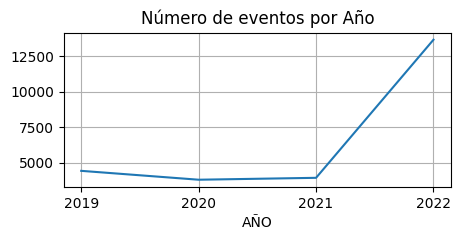

In [12]:
#Año
from matplotlib.ticker import MultipleLocator
df.groupby('AÑO')['EVENTO'].count().plot(figsize =(5,2), title ='Número de eventos por Año', grid = True)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.show()

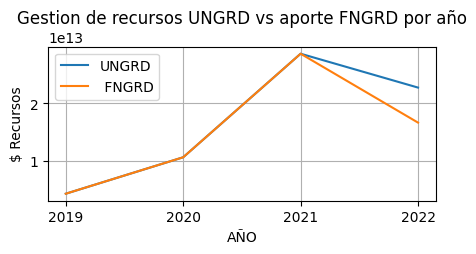

In [13]:
#Comparativa gestion de recursos UNGRD y FNGRD por año
plt.figure(figsize=(5,2))
df.groupby('AÑO')['RECURSOS_EJECUTADOS'].sum().plot()
df.groupby('AÑO')['VALOR TOTAL  APOYO DEL FNGRD'].sum().plot(ylabel = '$ Recursos')
plt.legend(['UNGRD',' FNGRD'])
plt.grid()
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.title('Gestion de recursos UNGRD vs aporte FNGRD por año')
plt.show()

Los recursos ejecutados por la UNGRD desde 2019 hasta 2021 provenian en su totalidad del FNGRD. Sin embargo, para 2022 se presento una disminución en la asignacione y los recursos ejecutados por la UNGRD fueron superirores al aporte realizado por el FNGRD.

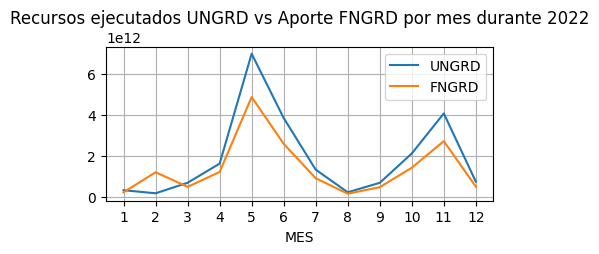

In [14]:
# Dist Recursos UNGRD vs aporte FNGRD durante 2022 mes a mes
plt.figure(figsize=(5,2))
df.query("AÑO == 2022").groupby(['MES'])['RECURSOS_EJECUTADOS'].sum().plot()
df.query("AÑO == 2022").groupby(['MES'])['VALOR TOTAL  APOYO DEL FNGRD'].sum().plot()
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.legend(['UNGRD','FNGRD'])
plt.title('Recursos ejecutados UNGRD vs Aporte FNGRD por mes durante 2022')
plt.grid()
plt.show()

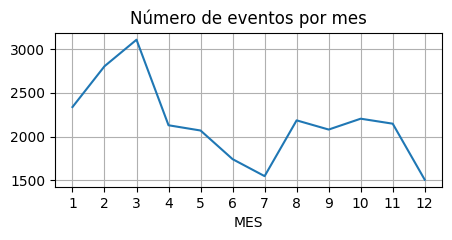

In [15]:
#Mes
df.groupby('MES')['EVENTO'].count().plot(grid = True, figsize =(5,2), title ='Número de eventos por mes')
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

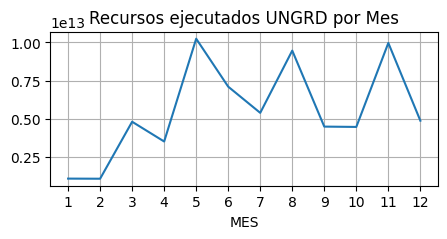

In [16]:
#Recursos ejecutados por mes
df.groupby('MES')['RECURSOS_EJECUTADOS'].sum().plot(figsize =(5,2), grid = True, title ='Recursos ejecutados UNGRD por Mes')
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.show()

2. Valor recursos ejecutados para ayuda en eventos por año y mes

In [17]:
df.groupby(['MES','AÑO'])['RECURSOS_EJECUTADOS'].sum().unstack().style.background_gradient(cmap='Blues')

AÑO,2019,2020,2021,2022
MES,,,,
1,55253725288,358839599683,336132824931,314267400000
2,688654828894,71178575120,134130789232,163303320000
3,627752515354,937981521859,2550771027457,678687048402
4,947970876667,144803436526,790917854398,1615460236644
5,378183660733,612170930523,2258190996341,6993959273184
6,825889552215,197265897605,2225914494359,3847766670444
7,89046303095,1384373438393,2584801330575,1320642394824
8,314535061204,1458446126573,7474951280540,213537000000
9,101676990000,275614698391,3423667154268,675724980000


3. Top 5 eventos con mayor recurriencia entre 2019 y 2022.

In [18]:
df.EVENTO.value_counts().head()

EVENTO
INCENDIO DE COBERTURA VEGETAL    7634
MOVIMIENTO EN MASA               6106
INUNDACION                       4431
VENDAVAL                         1710
INCENDIO ESTRUCTURAL             1524
Name: count, dtype: int64

4. Top 5 departamento con mayor ejecución de recursos UNGRD en 2022

In [19]:
df.query("RECURSOS_EJECUTADOS > 0  & AÑO == 2022").groupby('DEPARTAMENTO')['RECURSOS_EJECUTADOS'].sum().sort_values(ascending = False).head()

DEPARTAMENTO
NORTE DE SANTANDER    3848612379996
BOLIVAR               2621816037234
CUNDINAMARCA          2052357326763
NARIÑO                1731010154595
SANTANDER             1469159592972
Name: RECURSOS_EJECUTADOS, dtype: int64

5. Top 3 eventos con mayor destinación de recursos por tipo de evento

In [20]:
round(df.query("RECURSOS_EJECUTADOS >0").groupby('EVENTO')['RECURSOS_EJECUTADOS'].sum().sort_values(ascending = False)/ df.RECURSOS_EJECUTADOS.sum() *100,2).head(3)

EVENTO
INUNDACION            57.33
MOVIMIENTO EN MASA     7.65
CRECIENTE SUBITA       6.58
Name: RECURSOS_EJECUTADOS, dtype: float64

6. Evento de mayor recurrencia en el departamento de Santander durante el primer semestre de 2021. Durante este periodo, número de veces en que se presento este evento y recibio aportes por parte de la UNGRD.

In [21]:
#Evento de mayor recuerrencia en Santander primer semestre de 2021
df.query("DEPARTAMENTO == 'SANTANDER' & AÑO == 2021 & MES <= 6").groupby('EVENTO')['EVENTO'].count().sort_values(ascending = False).head(1)

EVENTO
INCENDIO DE COBERTURA VEGETAL    54
Name: EVENTO, dtype: int64

In [22]:
#Número de eventos durante el periodo que recibieron aportes de la UNGRD
df.query("DEPARTAMENTO == 'SANTANDER' & AÑO == 2021 & MES <= 6 & RECURSOS_EJECUTADOS != 0 & EVENTO == 'INCENDIO DE COBERTURA VEGETAL'").groupby('EVENTO')['RECURSOS_EJECUTADOS'].agg(['count','sum']).sort_values(by ='sum',ascending = False)

,count,sum
EVENTO,,
INCENDIO DE COBERTURA VEGETAL,3,137619452249


7. Destinación de recursos UNGRD por tipo de ayuda

In [23]:
#Creación df1 - análisis tipo de ayuda
df1 = df.loc[:,['FECHA','AÑO', 'MES','DEPARTAMENTO', 'MUNICIPIO', 'EVENTO',
       'SUBSIDIO DE ARRIENDO', 'ASISTENCIA NO ALIMENTARIA',
       'APOYO ALIMENTARIO', 'MATERIALES CONSTRUCCION', 'SACOS - BIGBAG',
       'OBRAS DE EMERGENCIA', 'CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA',
       'MAQUINARIA',
       'APOYO AEREO / TERRESTRE', 'FIC / TRANSFERENCIAS ECONOMICAS',
       'INFRAESCTRUCTURA TECNOLOGICA', 'OTROS']]

In [24]:
# Dinamización de columnas - Tipo de ayuda
DF1 = pd.melt(df1, id_vars=['FECHA','AÑO','MES','DEPARTAMENTO', 'MUNICIPIO', 'EVENTO'], var_name = 'TIPO_AYUDA', value_name ='TOTAL_AYUDAS').sort_values(by='FECHA', ascending = False)

In [25]:
#Estimación valor recursos ejecutados UNGRD por Tipo de Ayuda
round(DF1.query("TOTAL_AYUDAS>0").groupby('TIPO_AYUDA')['TOTAL_AYUDAS'].sum().sort_values(ascending= False)/DF1.TOTAL_AYUDAS.sum() *100,2)

TIPO_AYUDA
MAQUINARIA                                         48.51
ASISTENCIA NO ALIMENTARIA                          16.32
APOYO ALIMENTARIO                                  14.49
MATERIALES CONSTRUCCION                             6.06
FIC / TRANSFERENCIAS ECONOMICAS                     4.79
CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA     2.81
INFRAESCTRUCTURA TECNOLOGICA                        2.11
OBRAS DE EMERGENCIA                                 1.90
OTROS                                               1.38
SACOS - BIGBAG                                      0.87
APOYO AEREO / TERRESTRE                             0.39
SUBSIDIO DE ARRIENDO                                0.38
Name: TOTAL_AYUDAS, dtype: float64

8. Comparativa entre el monto destinado a transferencias económicas realizadas en 'MOVIMIENTOS EN MASA' entre 2019 y 2022 por año vs otro tipo de ayudas.

AÑO
2019    125000000000
2020    415628365000
2021    258333398200
2022               0
Name: TOTAL_AYUDAS, dtype: int64

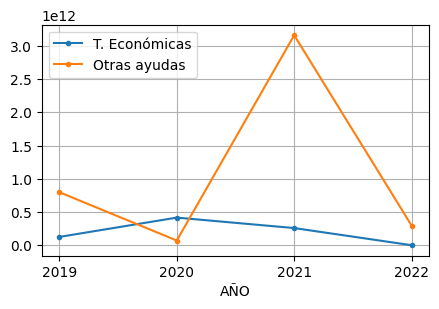

In [26]:
display(DF1.query("EVENTO == 'MOVIMIENTO EN MASA' & TIPO_AYUDA == 'FIC / TRANSFERENCIAS ECONOMICAS'").groupby('AÑO')['TOTAL_AYUDAS'].sum())
DF1.query("EVENTO == 'MOVIMIENTO EN MASA' & TIPO_AYUDA == 'FIC / TRANSFERENCIAS ECONOMICAS'").groupby('AÑO')['TOTAL_AYUDAS'].sum().plot(marker = '.', grid = True, figsize = (5,3), label ='T. Económicas')
DF1.query("EVENTO == 'MOVIMIENTO EN MASA' & TIPO_AYUDA != 'FIC / TRANSFERENCIAS ECONOMICAS'").groupby('AÑO')['TOTAL_AYUDAS'].sum().plot(marker = '.', grid = True, figsize = (5,3), label = 'Otras ayudas')
plt.legend()
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

9. Distribución de recursos ejecutados por tipo de ayuda en inundaciones durante 2019 y 2022 por año. 

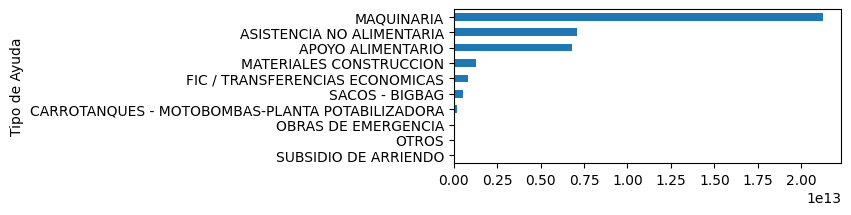

In [67]:
DF1.query("EVENTO == 'INUNDACION' & TOTAL_AYUDAS > 0").groupby('TIPO_AYUDA')['TOTAL_AYUDAS'].sum().sort_values(ascending=True).plot(kind ='barh', figsize =(5,2))
plt.ylabel('Tipo de Ayuda')
plt.show()

In [28]:
#Valor recursos ejecutados en subsidios de arriendo por tipo de evento
DF1.query("TIPO_AYUDA == 'SUBSIDIO DE ARRIENDO' & TOTAL_AYUDAS != 0").groupby('EVENTO')['TOTAL_AYUDAS'].sum().sort_values(ascending = False)

EVENTO
MOVIMIENTO EN MASA               185500000000
AVENIDA TORRENCIAL                17580000000
INCENDIO DE COBERTURA VEGETAL     15930000000
INUNDACION                        13950000000
INCENDIO ESTRUCTURAL               9600000000
VENDAVAL                           4425000000
CRECIENTE SUBITA                   3300000000
EROSION                            1050000000
SISMO                               975000000
Name: TOTAL_AYUDAS, dtype: int64

10. Proporción de eventos del total que recibieron apoyo por parte de la UNGRD por mes. 

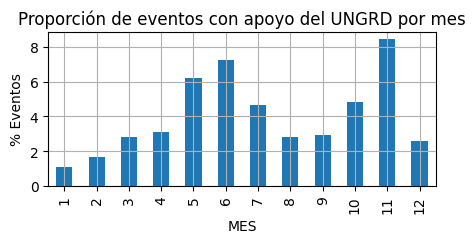

In [63]:
#Proporción de eventos del total que recibieron apoyo por parte de la UNGRD
(100* df.query("RECURSOS_EJECUTADOS != 0").groupby('MES')['EVENTO'].count() /
 df.groupby('MES')['EVENTO'].count()).plot(kind ='bar', figsize =(5,2), grid= True)
plt.title('Proporción de eventos con apoyo del UNGRD por mes')
plt.ylabel ('% Eventos')
plt.show()

11. Proporción de eventos que recibieron apoyo de la UNGRD por tipo de evento

In [60]:
#Proporción de eventos apoyados por la UNGRD por tipo de envento
(df.query("RECURSOS_EJECUTADOS != 0").groupby('EVENTO')['EVENTO'].count() / df.groupby('EVENTO')['EVENTO'].count() *100).dropna().sort_values(ascending = False)

EVENTO
COVID-19                                       100.000000
COLAPSO                                        100.000000
LLUVIAS                                         91.428571
OTROS                                           53.846154
EVENTO MAYOR                                    50.000000
CICLON TROPICAL: DEPRESION/TORMENTA/HURACAN     40.000000
SEQUIA                                          32.584270
INUNDACION                                      12.344843
EROSION                                          8.955224
AVENIDA TORRENCIAL                               7.540395
INCENDIO                                         6.250000
CRECIENTE SUBITA                                 4.201681
TEMPORAL                                         3.506098
VENDAVAL                                         3.450292
SISMO                                            2.631579
TORMENTA ELECTRICA                               1.694915
MOVIMIENTO EN MASA                               1.637733
ACCIDEN

In [79]:
df.query("EVENTO == 'COLAPSO'")

,FECHA,DEPARTAMENTO,MUNICIPIO,EVENTO,SUBSIDIO DE ARRIENDO,ASISTENCIA NO ALIMENTARIA,APOYO ALIMENTARIO,MATERIALES CONSTRUCCION,SACOS - BIGBAG,OBRAS DE EMERGENCIA,CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA,MAQUINARIA,APOYO AEREO / TERRESTRE,FIC / TRANSFERENCIAS ECONOMICAS,INFRAESCTRUCTURA TECNOLOGICA,OTROS,RECURSOS_EJECUTADOS,VALOR TOTAL APOYO DEL FNGRD,AÑO,MES
6482,2020-06-23,VALLE DEL CAUCA,BUENAVENTURA,COLAPSO,0,0,0,0,0,0,0,47278700000,0,0,0,0,47278700000,47278700000,2020,6


In [80]:
df.query("EVENTO == 'COVID-19'")

,FECHA,DEPARTAMENTO,MUNICIPIO,EVENTO,SUBSIDIO DE ARRIENDO,ASISTENCIA NO ALIMENTARIA,APOYO ALIMENTARIO,MATERIALES CONSTRUCCION,SACOS - BIGBAG,OBRAS DE EMERGENCIA,CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA,MAQUINARIA,APOYO AEREO / TERRESTRE,FIC / TRANSFERENCIAS ECONOMICAS,INFRAESCTRUCTURA TECNOLOGICA,OTROS,RECURSOS_EJECUTADOS,VALOR TOTAL APOYO DEL FNGRD,AÑO,MES
7353,2020-10-05,LA GUAJIRA,MAICAO,COVID-19,0,0,0,0,0,0,0,0,0,45000000000,0,0,45000000000,45000000000,2020,10


In [103]:
#% del total de transferencias - evento:covid-19
round(df.query("EVENTO == 'COVID-19'")['TRANSFERENCIAS_ECONOMICAS'].sum() / df.TRANSFERENCIAS_ECONOMICAS.sum() *100,2)

1.4